![iris image](images/iris_virginica.jpg)
# Analyzing Employee Performance and Retention

## Overview

## Data Understanding



## CRISP-DM Headers

## Data Preparation

## Data Cleaning/Processing

## Analysis/Recommendations


## Conclusion

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# Load in data
emp_df = pd.read_csv('data/emp_perf.csv', index_col=0, parse_dates=['Hire_Date'])
emp_df.head()

,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
Employee_ID,,,,,,,,,,,,,,,,,,,
1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


In [13]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 1 to 100000
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Department                   100000 non-null  object        
 1   Gender                       100000 non-null  object        
 2   Age                          100000 non-null  int64         
 3   Job_Title                    100000 non-null  object        
 4   Hire_Date                    100000 non-null  datetime64[ns]
 5   Years_At_Company             100000 non-null  int64         
 6   Education_Level              99463 non-null   object        
 7   Performance_Score            100000 non-null  int64         
 8   Monthly_Salary               99000 non-null   float64       
 9   Work_Hours_Per_Week          100000 non-null  int64         
 10  Projects_Handled             100000 non-null  int64         
 11  Overtime_Hours               10

- 100,000 rows, 19 columns
- Have some null values in Education_level and Monthly_Salary
- Mismatched datatypes, datetimes (which was handled with pd.read_csv())
- We want to explore object columns with value_counts()

In [14]:
emp_df.describe()

,Age,Hire_Date,Years_At_Company,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
count,100000.000000,100000,100000.000000,100000.000000,99000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.029410,2019-09-15 06:20:20.916036096,4.476070,2.995430,6402.446970,44.956950,24.431170,14.514930,7.008550,50.090500,10.013560,49.506060,0.999720,2.999088
min,22.000000,2014-09-07 08:03:05.556036,0.000000,1.000000,3850.000000,30.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,31.000000,2017-03-20 08:03:05.556036096,2.000000,2.000000,5250.000000,37.000000,12.000000,7.000000,3.000000,25.000000,5.000000,25.000000,0.000000,2.010000
50%,41.000000,2019-09-21 08:03:05.556036096,4.000000,3.000000,6500.000000,45.000000,24.000000,15.000000,7.000000,50.000000,10.000000,49.000000,1.000000,3.000000
75%,51.000000,2022-03-14 08:03:05.556036096,7.000000,4.000000,7500.000000,53.000000,37.000000,22.000000,11.000000,75.000000,15.000000,75.000000,2.000000,3.990000
max,60.000000,2024-09-03 08:03:05.556036,10.000000,5.000000,9000.000000,60.000000,49.000000,29.000000,14.000000,100.000000,19.000000,99.000000,2.000000,5.000000
std,11.244121,NaN,2.869336,1.414726,1372.643449,8.942003,14.469584,8.664026,4.331591,35.351157,5.495405,28.890383,0.815872,1.150719


There a few datapoints that might be considered outliers when looking at columns like Training_Hours and Sick_Days and Project_Handled

In [15]:
emp_df.describe(include=['object'])

,Department,Gender,Job_Title,Education_Level
count,100000,100000,100000,99463
unique,9,3,7,4
top,Marketing,Male,Specialist,Bachelor
freq,11216,48031,14507,49763


In [18]:
num_cols = list(emp_df.select_dtypes(include=['number']).columns)
num_cols

['Age',
 'Years_At_Company',
 'Performance_Score',
 'Monthly_Salary',
 'Work_Hours_Per_Week',
 'Projects_Handled',
 'Overtime_Hours',
 'Sick_Days',
 'Remote_Work_Frequency',
 'Team_Size',
 'Training_Hours',
 'Promotions',
 'Employee_Satisfaction_Score']

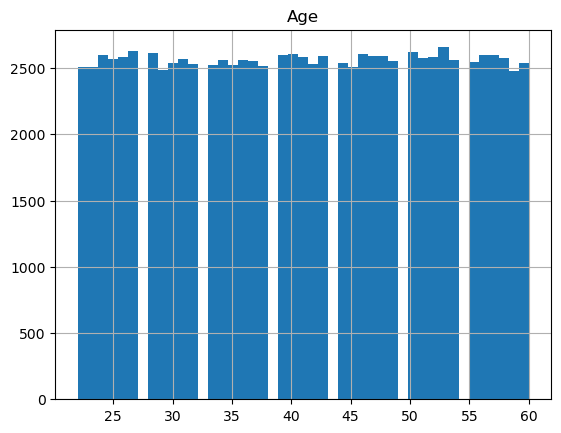

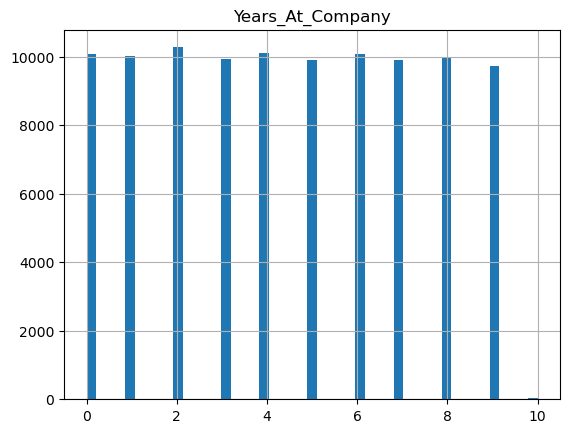

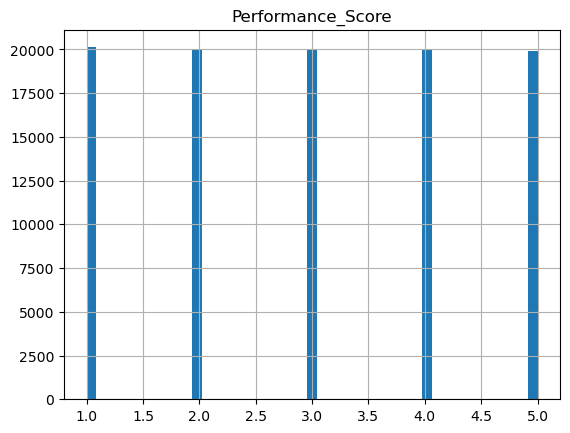

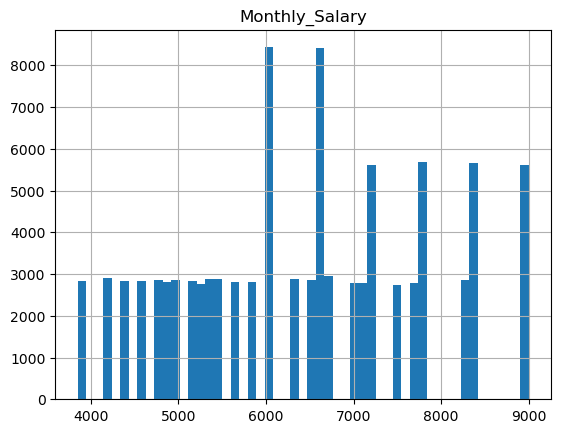

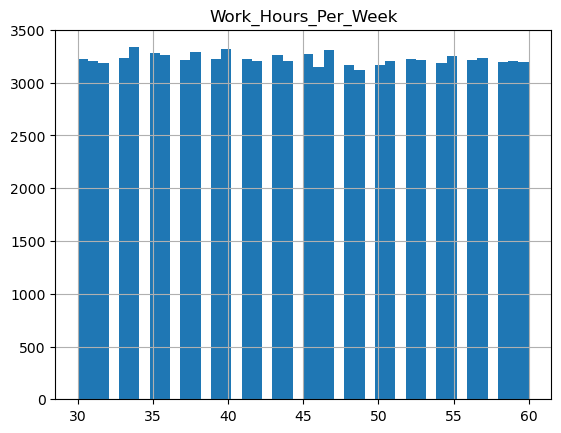

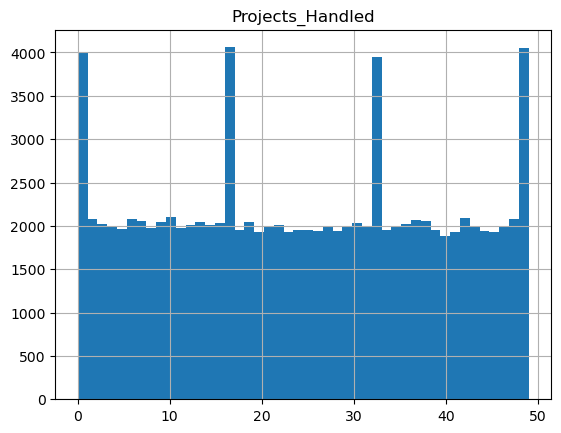

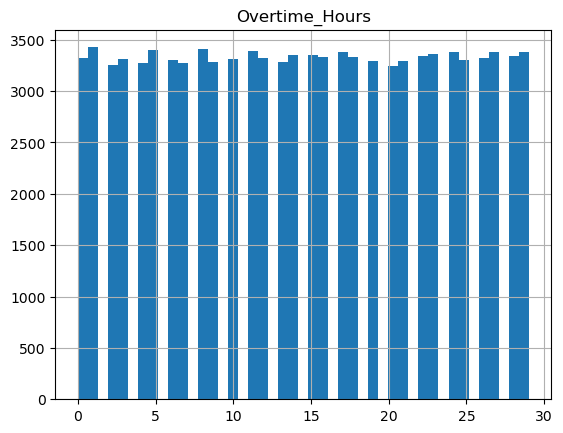

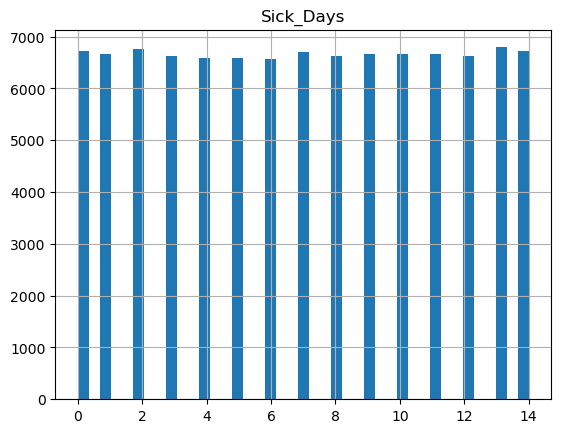

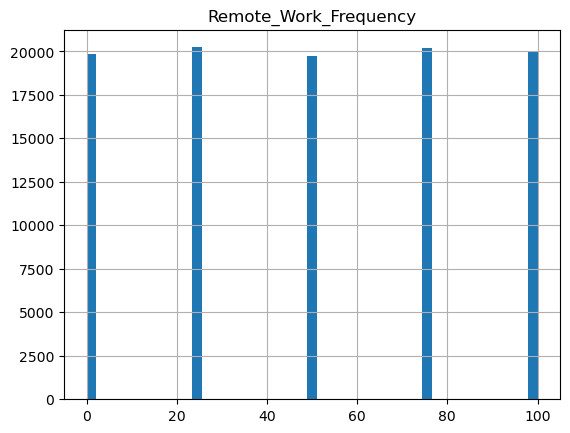

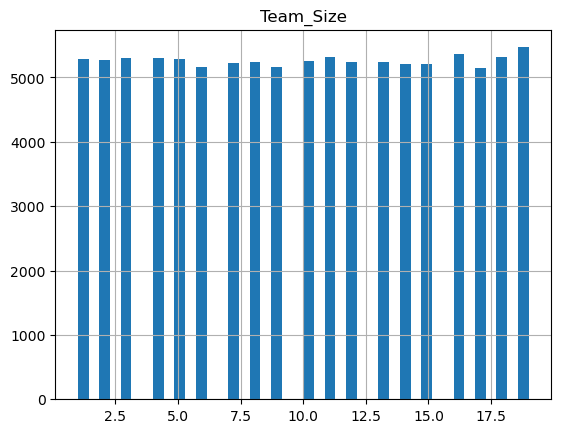

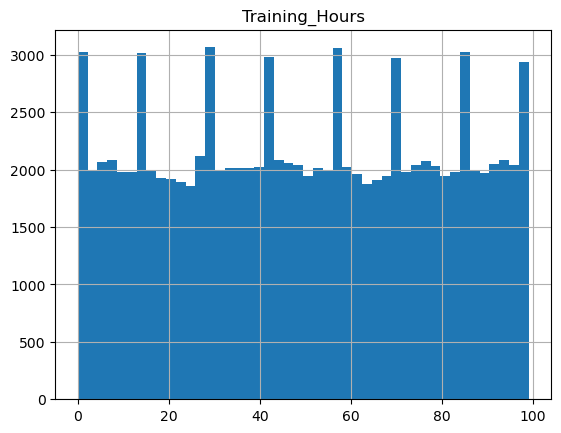

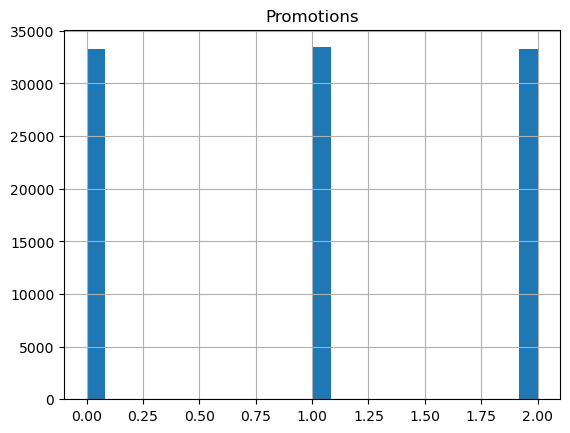

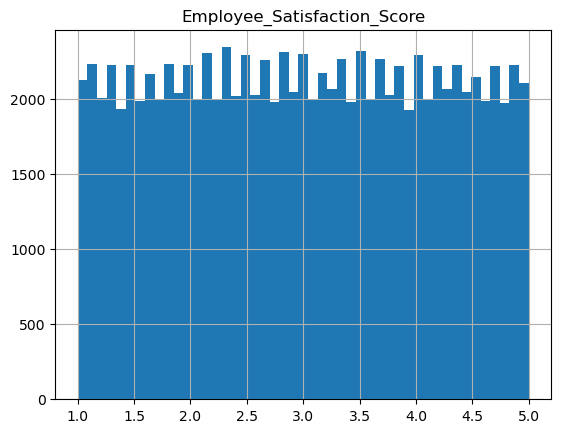

In [23]:
for col in num_cols:
    emp_df[col].hist(bins='auto')
    plt.title(col)
    plt.show()

In [24]:
obj_cols = list(emp_df.select_dtypes(include=['object']).columns)
obj_cols

['Department', 'Gender', 'Job_Title', 'Education_Level']

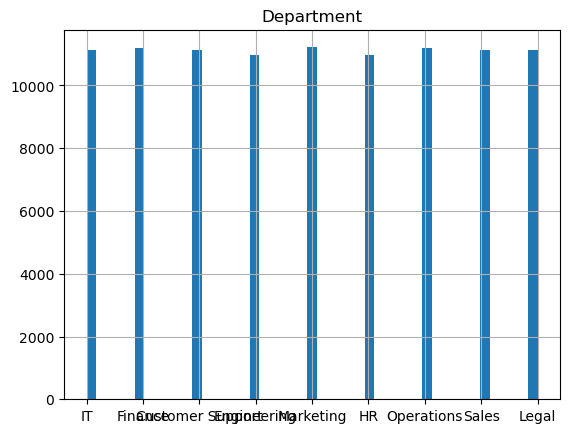

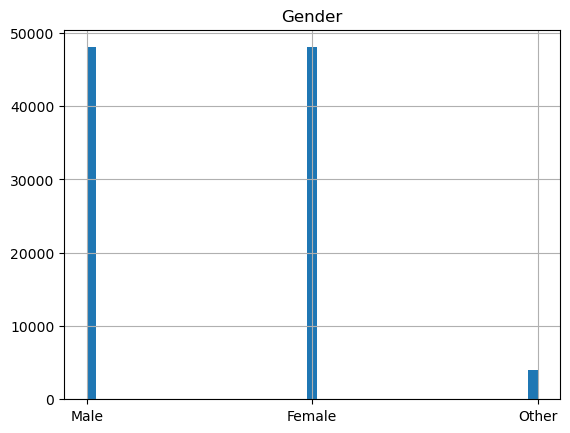

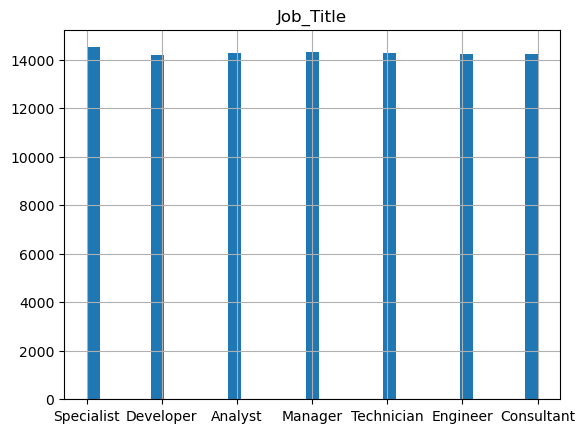

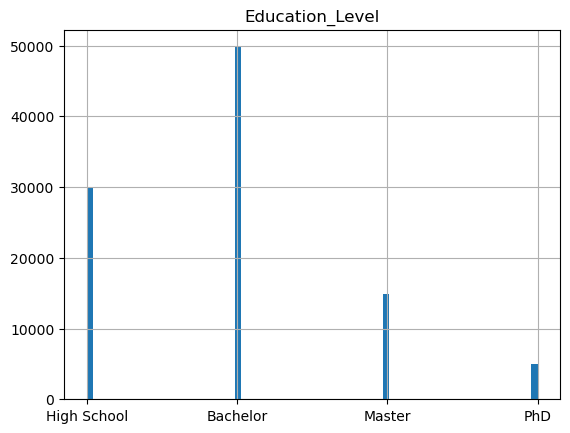

In [26]:
for col in obj_cols:
    emp_df[col].hist(bins='auto')
    plt.title(col)
    plt.show()

In [27]:
emp_df

,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
Employee_ID,,,,,,,,,,,,,,,,,,,
1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,Finance,Male,27,Technician,2022-12-07 08:03:05.556036,1,Bachelor,4,4900.0,55,46,5,3,75,16,48,2,1.28,False
99997,IT,Female,36,Consultant,2018-07-24 08:03:05.556036,6,Master,5,8250.0,39,35,7,0,0,10,77,1,3.48,True
99998,Operations,Male,53,Analyst,2015-11-24 08:03:05.556036,8,High School,2,4800.0,31,13,6,5,0,5,87,1,2.60,False


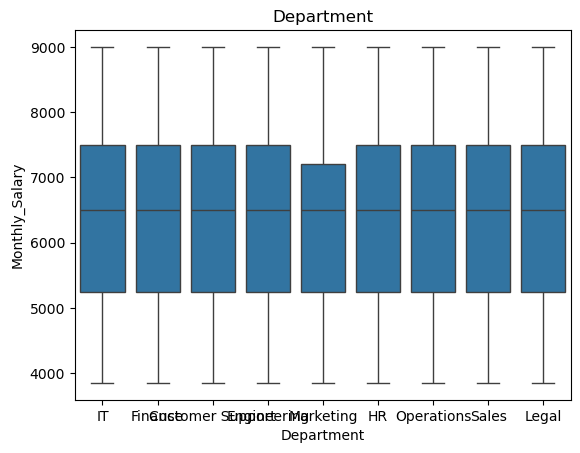

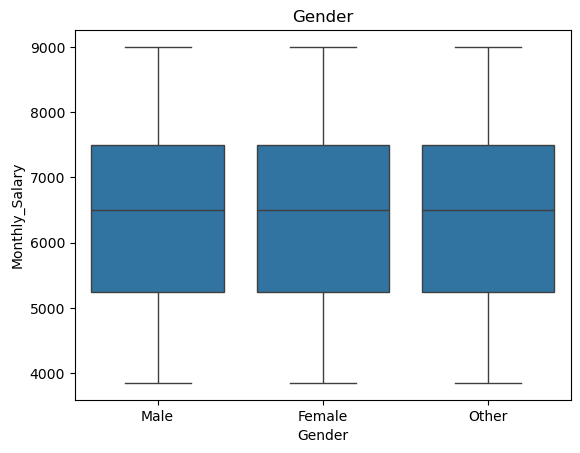

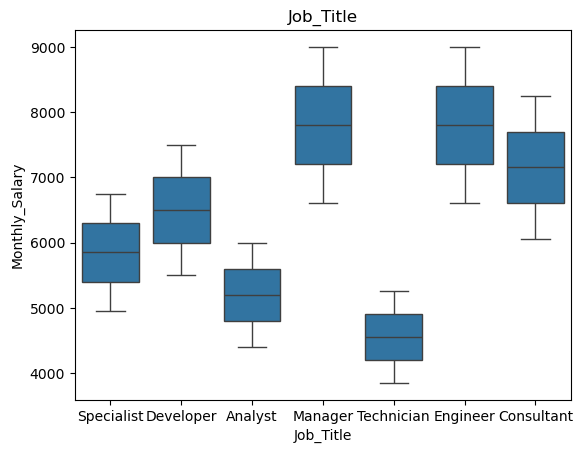

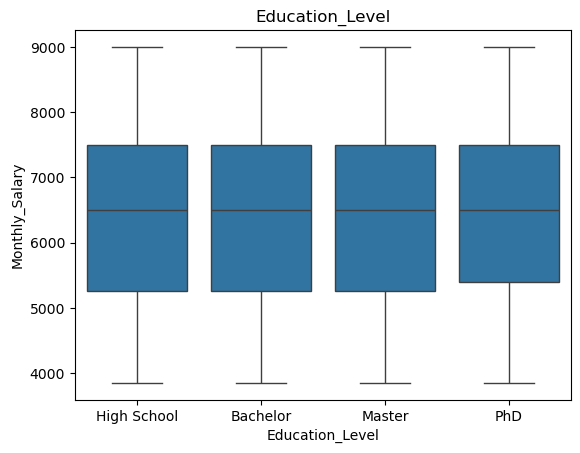

In [30]:
for col in obj_cols:
    sns.boxplot(data=emp_df, x=col, y='Monthly_Salary')
    plt.title(col)
    plt.show()

In [31]:
emp_df.isna().sum()

Department                        0
Gender                            0
Age                               0
Job_Title                         0
Hire_Date                         0
Years_At_Company                  0
Education_Level                 537
Performance_Score                 0
Monthly_Salary                 1000
Work_Hours_Per_Week               0
Projects_Handled                  0
Overtime_Hours                    0
Sick_Days                         0
Remote_Work_Frequency             0
Team_Size                         0
Training_Hours                    0
Promotions                        0
Employee_Satisfaction_Score       0
Resigned                          0
dtype: int64

In [32]:
1000 / 100000

0.01

In [35]:
emp_df['Education_Level'].value_counts().index[0]

'Bachelor'

How we handled the nulls in that column and why

In [36]:
emp_df['Education_Level'] = emp_df['Education_Level'].fillna(emp_df['Education_Level'].value_counts().index[0])

<Axes: >

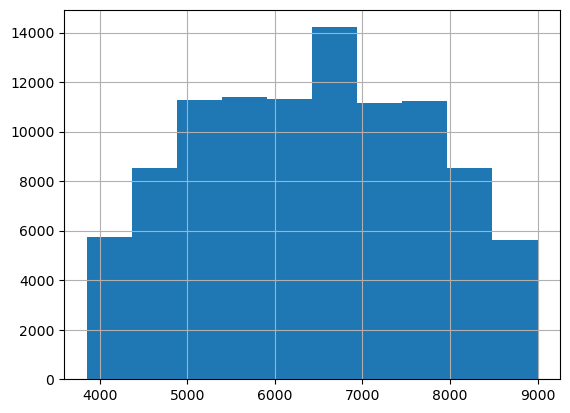

In [37]:
emp_df['Monthly_Salary'].hist()

In [42]:
salary_means = emp_df.groupby(by='Job_Title')['Monthly_Salary'].mean()
salary_means

Job_Title
Analyst       5196.117330
Consultant    7152.385863
Developer     6489.641916
Engineer      7799.274899
Manager       7798.010722
Specialist    5854.600139
Technician    4544.386746
Name: Monthly_Salary, dtype: float64

In [43]:
salary_means['Analyst']

5196.1173303103305

In [56]:
emp_df.iloc[0]['Monthly_Salary']

6750.0

In [57]:
emp_df.iloc[0]['Job_Title']

'Specialist'

In [67]:
def map_function(row):
    if pd.isnull(row['Monthly_Salary']):
        return salary_means[row['Job_Title']]
    else:
        return row['Monthly_Salary']

In [61]:
emp_df

,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
Employee_ID,,,,,,,,,,,,,,,,,,,
1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,Finance,Male,27,Technician,2022-12-07 08:03:05.556036,1,Bachelor,4,4900.0,55,46,5,3,75,16,48,2,1.28,False
99997,IT,Female,36,Consultant,2018-07-24 08:03:05.556036,6,Master,5,8250.0,39,35,7,0,0,10,77,1,3.48,True
99998,Operations,Male,53,Analyst,2015-11-24 08:03:05.556036,8,High School,2,4800.0,31,13,6,5,0,5,87,1,2.60,False


In [62]:
emp_df['Monthly_Salary']

Employee_ID
1         6750.0
2         7500.0
3         5850.0
4         4800.0
5         4800.0
           ...  
99996     4900.0
99997     8250.0
99998     4800.0
99999     8250.0
100000    4400.0
Name: Monthly_Salary, Length: 100000, dtype: float64

In [85]:
emp_df['Monthly_Salary'] = emp_df.apply(map_function, axis=1)

In [87]:
emp_df.isna().sum()

Department                     0
Gender                         0
Age                            0
Job_Title                      0
Hire_Date                      0
Years_At_Company               0
Education_Level                0
Performance_Score              0
Monthly_Salary                 0
Work_Hours_Per_Week            0
Projects_Handled               0
Overtime_Hours                 0
Sick_Days                      0
Remote_Work_Frequency          0
Team_Size                      0
Training_Hours                 0
Promotions                     0
Employee_Satisfaction_Score    0
Resigned                       0
Monthly_Salary_Filled          0
dtype: int64

In [69]:
pd.isnull(emp_df.iloc[0]['Monthly_Salary'])

False

In [90]:
emp_df['Monthly_Salary'] = emp_df.apply(lambda row: salary_means[row['Job_Title']] if pd.isnull(row['Monthly_Salary']) else row['Monthly_Salary'], axis=1)

In [75]:
conditions = [(pd.isna(emp_df['Monthly_Salary'])) & (emp_df['Job_Title'] == 'Analyst')]
choice = [salary_means['Analyst']]

emp_df['Monthly_Salary_Filled'] = np.select(conditions, choice)

In [77]:
emp_df.isna().sum()

Department                        0
Gender                            0
Age                               0
Job_Title                         0
Hire_Date                         0
Years_At_Company                  0
Education_Level                   0
Performance_Score                 0
Monthly_Salary                 1000
Work_Hours_Per_Week               0
Projects_Handled                  0
Overtime_Hours                    0
Sick_Days                         0
Remote_Work_Frequency             0
Team_Size                         0
Training_Hours                    0
Promotions                        0
Employee_Satisfaction_Score       0
Resigned                          0
Monthly_Salary_Filled             0
dtype: int64

In [84]:
emp_df[emp_df['Monthly_Salary'].isna()]

,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned,Monthly_Salary_Filled
Employee_ID,,,,,,,,,,,,,,,,,,,,
85,Marketing,Female,46,Specialist,2015-09-16 08:03:05.556036,8,Bachelor,2,NaN,44,16,13,13,100,11,0,1,4.27,False,0.00000
110,Sales,Male,36,Consultant,2018-09-23 08:03:05.556036,5,High School,5,NaN,50,32,28,5,50,9,56,0,1.64,False,0.00000
128,Sales,Male,31,Consultant,2022-06-16 08:03:05.556036,2,Bachelor,2,NaN,59,27,22,6,100,1,44,2,1.74,False,0.00000
378,Engineering,Female,33,Developer,2015-05-11 08:03:05.556036,9,Bachelor,4,NaN,57,49,28,2,75,14,29,0,3.35,True,0.00000
424,Finance,Female,31,Manager,2017-05-15 08:03:05.556036,7,Master,4,NaN,37,49,8,14,25,11,62,0,3.74,False,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,Marketing,Female,56,Manager,2018-06-26 08:03:05.556036,6,High School,3,NaN,33,38,13,4,75,12,39,1,1.42,False,0.00000
99587,IT,Male,36,Analyst,2016-11-20 08:03:05.556036,7,Bachelor,2,NaN,58,14,13,12,50,9,39,1,3.15,False,5196.11733
99610,IT,Male,60,Consultant,2018-11-26 08:03:05.556036,5,Master,2,NaN,49,27,14,5,100,6,14,1,3.13,False,0.00000


In [92]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 1 to 100000
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Department                   100000 non-null  object        
 1   Gender                       100000 non-null  object        
 2   Age                          100000 non-null  int64         
 3   Job_Title                    100000 non-null  object        
 4   Hire_Date                    100000 non-null  datetime64[ns]
 5   Years_At_Company             100000 non-null  int64         
 6   Education_Level              100000 non-null  object        
 7   Performance_Score            100000 non-null  int64         
 8   Monthly_Salary               100000 non-null  float64       
 9   Work_Hours_Per_Week          100000 non-null  int64         
 10  Projects_Handled             100000 non-null  int64         
 11  Overtime_Hours               10

In [93]:
emp_df.to_csv('data/cleaned_emp.csv')